<a href="https://colab.research.google.com/github/wbandabarragan/quantum-mechanics-1/blob/main/unit-2/Python-Notebook-203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## C) Finite square well potential

This potential allows:

Bound states: $E<0$

Scattering states: $E>0$

For bound states, the wavenumbers and energies are quantised:

$tan(z) = \sqrt{\frac{z_0^2}{z^2} -1}$

where $z=la$, $z_0^2= \frac{2ma^2V_0}{\hbar^2}$

$l=\frac{\sqrt{2m(E+V_0)}}{\hbar}$

$k=l\,tan(la) = \frac{\sqrt{-2mE}}{\hbar}$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.constants as cte

In [ ]:
# Define all constants

hbar = cte.hbar # Planck constant
m = cte.m_e # Mass of e-
a = 2e-10 # half of the width of the well, in m = 2Angstrom = 0.2nm
V0 = 1.60218e-17 # in J = 100eV

# Compute z0
z0 = np.sqrt(2*m*a**2*V0/hbar**2)

print(z0)

10.246345202565001


In [ ]:
# Vector for z axis
z = np.arange(0, 4*np.pi, 0.001)

# Functions:
y_lhs = np.tan(z)

y_rhs = np.sqrt((z0/z)**2 - 1)


<ipython-input-3-b976e7470526>:7: RuntimeWarning: divide by zero encountered in true_divide
  y_rhs = np.sqrt((z0/z)**2 - 1)
<ipython-input-3-b976e7470526>:7: RuntimeWarning: invalid value encountered in sqrt
  y_rhs = np.sqrt((z0/z)**2 - 1)


### Graphical solution

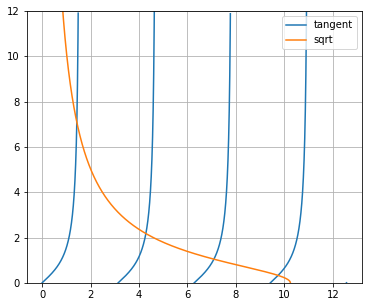

In [ ]:
# Plotting

plt.figure(figsize= (6,5))

# We need to cut the tangent
limit_y = 12
y_lhs[y_lhs > limit_y] = np.nan
y_lhs[y_lhs < -limit_y] = np.nan

plt.plot(z, y_lhs, label = "tangent")
plt.plot(z, y_rhs, label = "sqrt")

plt.ylim(0, 12)
plt.legend()
plt.grid()
plt.show()



### Optimisation:

In [ ]:
# Functional:

def tan_func(z, z0):

  func = np.tan(z)/np.sqrt((z0/z)**2 - 1) - 1

  return func

In [ ]:
# Optimise, ansatz = educated guess

result = opt.root(tan_func, [1.5, 4, 6.5, 10], args=(z0))


In [ ]:
print(result)

    fjac: array([[ 0.9996883 ,  0.00887903,  0.02240062, -0.00653298],
       [-0.00687103,  0.99547706, -0.09309339, -0.01765853],
       [ 0.0232733 , -0.09248996, -0.99516809,  0.02333319],
       [-0.00586921, -0.01980366, -0.02173267, -0.99955043]])
     fun: array([-1.51401935e-09, -4.86488849e-10,  3.65580011e-10, -2.93148839e-11])
 message: 'The solution converged.'
    nfev: 21
     qtf: array([ 7.54365813e-08,  3.78492143e-08,  1.36926286e-08, -5.63590708e-09])
       r: array([ 7.82901651,  0.09797361,  0.24306789, -0.03641627,  2.50115731,
       -0.19555275,  3.87424982, -2.27436034, -1.87050482, -5.20827813])
  status: 1
 success: True
       x: array([1.43070756, 4.28132347, 7.0898145 , 9.74035488])


In [ ]:
# Actual results for z from optimisation

print("Allowed values for z are:\n",  result.x)

Allowed values for z are:
 [1.43070756 4.28132347 7.0898145  9.74035488]


In [ ]:
# Calculate l = z/a, inside the well

print("Allowed values for l in [m^-1] are:\n",  result.x/a)


Allowed values for l in [m^-1] are:
 [7.15353780e+09 2.14066173e+10 3.54490725e+10 4.87017744e+10]


In [ ]:
# Calculate k = l*tan(la), outside the well

k_values = ((result.x)/a)*np.tan(result.x)

print("Allowed values for k in [m^-1] are:\n",  k_values)

Allowed values for k in [m^-1] are:
 [5.07298397e+10 4.65451016e+10 3.69872006e+10 1.59005321e+10]


### Allowed Energies:

$E = -\frac{k^2\hbar^2}{2m}$

In [ ]:
E_values = -(k_values**2*hbar**2)/(2*m)

print("Allowed values for E in [J] are:\n",  E_values)

Allowed values for E in [J] are:
 [-1.57094258e-17 -1.32245620e-17 -8.35095717e-18 -1.54332236e-18]


In [ ]:
print("Allowed values for E in [eV] are:\n",  E_values/1.60218e-19)

Allowed values for E in [eV] are:
 [-98.05031773 -82.54105013 -52.12246546  -9.63264025]


### Shallow, narrow potential:

$z_0<\frac{\pi}{2}$

In [ ]:
# Modify the potential properties

a = 2e-10/4 # half of the width of the well, in m = 0.5Angstrom = 0.05nm
V0 = 1.60218e-17/4 # in J = 25eV

# Compute z0
z0 = np.sqrt(2*m*a**2*V0/hbar**2)

print(z0, np.pi/2)

1.2807931503206251 1.5707963267948966


In [ ]:
# Vector for z axis
z = np.arange(0, 4*np.pi, 0.001)

# Functions:
y_lhs = np.tan(z)

y_rhs = np.sqrt((z0/z)**2 - 1)

<ipython-input-14-b976e7470526>:7: RuntimeWarning: divide by zero encountered in true_divide
  y_rhs = np.sqrt((z0/z)**2 - 1)
<ipython-input-14-b976e7470526>:7: RuntimeWarning: invalid value encountered in sqrt
  y_rhs = np.sqrt((z0/z)**2 - 1)


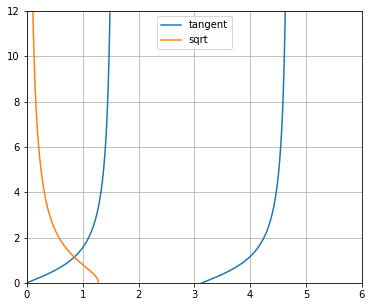

In [ ]:
# Plotting

plt.figure(figsize= (6,5))

# We need to cut the tangent
limit_y = 12
y_lhs[y_lhs > limit_y] = np.nan
y_lhs[y_lhs < -limit_y] = np.nan

plt.plot(z, y_lhs, label = "tangent")
plt.plot(z, y_rhs, label = "sqrt")

plt.xlim(0, 6)
plt.ylim(0, 12)
plt.legend()
plt.grid()
plt.show()



### Optimisation:

In [ ]:
# Optimise, ansatz = educated guess

result = opt.root(tan_func, [1.0], args=(z0))

# Actual results for z from optimisation

print("Allowed values for z are:\n",  result.x)

Allowed values for z are:
 [0.8476045]


In [ ]:
# Calculate l = z/a, inside the well

print("Allowed values for l in [m^-1] are:\n",  result.x/a)

# Calculate k = l*tan(la), outside the well

k_values = ((result.x)/a)*np.tan(result.x)

print("Allowed values for k in [m^-1] are:\n",  k_values)

# Calculate allow value for the energy

E_values = -(k_values**2*hbar**2)/(2*m)

print("Allowed values for E in [J] are:\n",  E_values)

print("Allowed values for E in [eV] are:\n",  E_values/1.60218e-19)

Allowed values for l in [m^-1] are:
 [1.695209e+10]
Allowed values for k in [m^-1] are:
 [1.92041423e+10]
Allowed values for E in [J] are:
 [-2.25124708e-18]
Allowed values for E in [eV] are:
 [-14.05114958]


### Wide, deep potential

$z_0>>0$

In [ ]:
# Modify the potential properties

a = 2e-10*1.5 # half of the width of the well, in m = 3Angstrom = 0.3nm
V0 = 1.60218e-17*1.5 # in J = 150eV

# Compute z0
z0 = np.sqrt(2*m*a**2*V0/hbar**2)

print(z0)

18.823738106023946


In [ ]:
# Vector for z axis
z = np.arange(0, 7*np.pi, 0.001)

# Functions:
y_lhs = np.tan(z)

y_rhs = np.sqrt((z0/z)**2 - 1)

<ipython-input-19-21c18c22d3cd>:7: RuntimeWarning: divide by zero encountered in true_divide
  y_rhs = np.sqrt((z0/z)**2 - 1)
<ipython-input-19-21c18c22d3cd>:7: RuntimeWarning: invalid value encountered in sqrt
  y_rhs = np.sqrt((z0/z)**2 - 1)


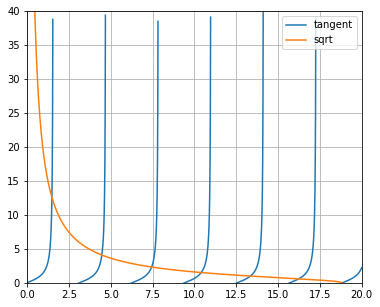

In [ ]:
# Plotting

plt.figure(figsize= (6,5))

# We need to cut the tangent
limit_y = 40
y_lhs[y_lhs > limit_y] = np.nan
y_lhs[y_lhs < -limit_y] = np.nan

plt.plot(z, y_lhs, label = "tangent")
plt.plot(z, y_rhs, label = "sqrt")

plt.xlim(0, 20)
plt.ylim(0, 40)
plt.legend()
plt.grid()
plt.show()



### Optimisation:



In [ ]:
# Optimise, ansatz = educated guess

result = opt.root(tan_func, [1.5, 4.5, 7.4, 10.2, 13., 16.5], args=(z0))

#print(result)
# Actual results for z from optimisation

print("Allowed values for z are:\n",  result.x)

Allowed values for z are:
 [ 1.49147923  4.47249596  7.44722833 10.40960849 13.34887356 16.23827615]


In [ ]:
# Calculate l = z/a, inside the well

print("Allowed values for l in [m^-1] are:\n",  result.x/a)

# Calculate k = l*tan(la), outside the well

k_values = ((result.x)/a)*np.tan(result.x)

print("Allowed values for k in [m^-1] are:\n",  k_values)

# Calculate allow value for the energy

E_values = -(k_values**2*hbar**2)/(2*m)

print("Allowed values for E in [J] are:\n",  E_values)

print("Allowed values for E in [eV] are:\n",  E_values/1.60218e-19)

Allowed values for l in [m^-1] are:
 [4.97159744e+09 1.49083199e+10 2.48240944e+10 3.46986950e+10
 4.44962452e+10 5.41275872e+10]
Allowed values for k in [m^-1] are:
 [6.25485238e+10 6.09489671e+10 5.76263743e+10 5.22784389e+10
 4.42393353e+10 3.17370278e+10]
Allowed values for E in [J] are:
 [-2.38818222e-17 -2.26759782e-17 -2.02710350e-17 -1.66831691e-17
 -1.19467704e-17 -6.14845270e-18]
Allowed values for E in [eV] are:
 [-149.05829669 -141.53202656 -126.52158297 -104.12793264  -74.56571902
  -38.37554268]
